In [1]:
import os
import re
import scipy
from scipy import stats
import pickle
import subprocess
import shlex
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X_train_df = pd.read_csv('median_icumean_train.csv')
X_test_df = pd.read_csv('median_icumean_test.csv')
X_holdout_df = pd.read_csv('median_icumean_holdout.csv')

print(X_train_df.shape)
print(X_test_df.shape)
print(X_holdout_df.shape)

(14283, 67)
(4080, 67)
(2041, 67)


In [3]:
X_train_df.head()

,id,hosp_admittime,hosp_dischtime,icu_intime,icu_outtime,los_icu,icu_death,gender,admission_age,weight_admit,...,mch,mchc,mcv,platelet,rbc,rdw,wbc,inr,pt,ptt
0,20001305,1978-03-25 02:58:00,1978-03-27 19:23:00,1978-03-25 02:59:00,1978-03-27 21:46:00,2.78,1,0,84.227760,44.0,...,30.100000,32.70,91.000000,182.000000,3.300000,15.600000,9.900000,1.333333,14.333333,32.766667
1,20001361,2043-05-04 14:55:00,2043-05-18 16:58:00,2043-05-04 16:52:00,2043-05-10 17:59:00,6.05,0,1,30.338465,102.0,...,30.320000,33.56,90.000000,209.600000,3.684000,14.220000,15.260000,1.600000,17.380000,31.240000
2,20002506,2032-03-19 05:42:00,2032-03-28 16:09:00,2032-03-19 05:50:00,2032-03-25 19:23:00,6.56,0,1,24.214207,60.0,...,30.100000,33.50,89.333333,193.333333,4.020000,13.133333,9.633333,1.266667,13.600000,31.033333
3,20003425,2055-07-21 10:00:00,2055-07-29 14:40:00,2055-07-22 17:13:00,2055-07-26 17:11:00,4.00,0,1,76.551461,72.7,...,27.900000,31.05,90.000000,214.000000,2.720000,15.650000,10.100000,1.400000,15.000000,33.500000
4,20003491,1997-12-18 04:50:00,1997-12-28 17:29:00,1997-12-18 06:10:00,1997-12-20 19:02:00,2.54,0,1,56.963058,60.0,...,29.966667,32.70,91.000000,169.666667,3.523333,15.700000,8.600000,1.533333,16.500000,36.500000


In [4]:
X_train_df.describe()

,id,los_icu,icu_death,gender,admission_age,weight_admit,height,charlson_score,atrial_fibrillation,malignant_cancer,...,mch,mchc,mcv,platelet,rbc,rdw,wbc,inr,pt,ptt
count,1.428300e+04,14283.000000,14283.00000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,...,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000,14283.000000
mean,2.499301e+07,4.862968,0.10691,0.562977,67.230634,85.348792,169.749871,5.810334,0.267591,0.129105,...,29.923418,32.661421,91.450866,199.855313,3.422641,15.751874,11.883691,1.531261,16.551365,36.770599
std,2.871706e+06,6.045947,0.30901,0.496035,15.602344,28.642186,7.923268,2.924375,0.442719,0.335327,...,2.295107,1.373935,6.139115,95.897348,0.588463,2.025444,8.359243,0.634117,6.614060,12.993901
min,2.000130e+07,1.000000,0.00000,0.000000,18.009528,1.000000,122.000000,0.000000,0.000000,0.000000,...,16.700000,25.500000,53.400000,8.000000,1.360000,11.300000,0.100000,0.800000,8.700000,18.250000
25%,2.251859e+07,1.800000,0.00000,0.000000,57.416664,68.500000,168.000000,4.000000,0.000000,0.000000,...,28.850000,31.866667,88.000000,145.000000,3.045000,14.450000,8.350000,1.275000,13.933333,31.000000
50%,2.500208e+07,2.880000,0.00000,1.000000,68.533893,81.500000,170.000000,6.000000,0.000000,0.000000,...,30.050000,32.700000,91.000000,185.666667,3.370000,15.400000,10.500000,1.400000,15.000000,33.500000
75%,2.746099e+07,5.270000,0.00000,1.000000,78.917610,97.600000,170.000000,8.000000,1.000000,0.000000,...,31.126786,33.475000,94.500000,235.000000,3.760000,16.633333,13.733333,1.500000,16.233333,36.500000
max,2.999962e+07,101.730000,1.00000,1.000000,100.058421,1010.000000,203.000000,17.000000,1.000000,1.000000,...,43.075000,39.800000,130.750000,1285.500000,6.770000,34.600000,309.450000,12.550000,136.475000,150.000000


In [5]:
# Converting los_icu into 3 categorical bins

low_thres = 2.5
medium_thres = 5

X_train_df['icu_cat'] = 10
X_train_df.loc[X_train_df['los_icu'] < low_thres, 'icu_cat'] = 0
X_train_df.loc[((X_train_df['los_icu'] >= low_thres) & (X_train_df['los_icu'] < medium_thres)), 'icu_cat'] = 1
X_train_df.loc[X_train_df['los_icu'] >= medium_thres, 'icu_cat'] = 2

X_test_df['icu_cat'] = 10
X_test_df.loc[X_test_df['los_icu'] < low_thres, 'icu_cat'] = 0
X_test_df.loc[((X_test_df['los_icu'] >= low_thres) & (X_test_df['los_icu'] < medium_thres)), 'icu_cat'] = 1
X_test_df.loc[X_test_df['los_icu'] >= medium_thres, 'icu_cat'] = 2

X_holdout_df['icu_cat'] = 10
X_holdout_df.loc[X_holdout_df['los_icu'] < low_thres, 'icu_cat'] = 0
X_holdout_df.loc[((X_holdout_df['los_icu'] >= low_thres) & (X_holdout_df['los_icu'] < medium_thres)), 'icu_cat'] = 1
X_holdout_df.loc[X_holdout_df['los_icu'] >= medium_thres, 'icu_cat'] = 2

In [6]:
print(X_train_df.shape)
print(X_test_df.shape)
print(X_holdout_df.shape)

(14283, 68)
(4080, 68)
(2041, 68)


In [7]:
X_train_df.head()

,id,hosp_admittime,hosp_dischtime,icu_intime,icu_outtime,los_icu,icu_death,gender,admission_age,weight_admit,...,mchc,mcv,platelet,rbc,rdw,wbc,inr,pt,ptt,icu_cat
0,20001305,1978-03-25 02:58:00,1978-03-27 19:23:00,1978-03-25 02:59:00,1978-03-27 21:46:00,2.78,1,0,84.227760,44.0,...,32.70,91.000000,182.000000,3.300000,15.600000,9.900000,1.333333,14.333333,32.766667,1
1,20001361,2043-05-04 14:55:00,2043-05-18 16:58:00,2043-05-04 16:52:00,2043-05-10 17:59:00,6.05,0,1,30.338465,102.0,...,33.56,90.000000,209.600000,3.684000,14.220000,15.260000,1.600000,17.380000,31.240000,2
2,20002506,2032-03-19 05:42:00,2032-03-28 16:09:00,2032-03-19 05:50:00,2032-03-25 19:23:00,6.56,0,1,24.214207,60.0,...,33.50,89.333333,193.333333,4.020000,13.133333,9.633333,1.266667,13.600000,31.033333,2
3,20003425,2055-07-21 10:00:00,2055-07-29 14:40:00,2055-07-22 17:13:00,2055-07-26 17:11:00,4.00,0,1,76.551461,72.7,...,31.05,90.000000,214.000000,2.720000,15.650000,10.100000,1.400000,15.000000,33.500000,1
4,20003491,1997-12-18 04:50:00,1997-12-28 17:29:00,1997-12-18 06:10:00,1997-12-20 19:02:00,2.54,0,1,56.963058,60.0,...,32.70,91.000000,169.666667,3.523333,15.700000,8.600000,1.533333,16.500000,36.500000,1


In [8]:
# splitting into X and Y

X_features_to_drop = ['id', 'los_icu', 'icu_death', 'hosp_admittime', 'hosp_dischtime', 'icu_intime', 'icu_outtime', 'icu_cat', 'icu_outcome']

y_train = X_train_df.icu_cat
X_train = X_train_df.drop(columns=X_features_to_drop)

y_test = X_test_df.icu_cat
X_test = X_test_df.drop(columns=X_features_to_drop)

y_holdout = X_holdout_df.icu_cat
X_holdout = X_holdout_df.drop(columns=X_features_to_drop)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(X_holdout.shape)
print(y_train.shape)
print(y_test.shape)
print(y_holdout.shape)

(14283, 59)
(4080, 59)
(2041, 59)
(14283,)
(4080,)
(2041,)


In [10]:
X_train.dtypes

gender                                                               int64
admission_age                                                      float64
weight_admit                                                       float64
height                                                             float64
charlson_score                                                       int64
atrial_fibrillation                                                  int64
malignant_cancer                                                     int64
chf                                                                  int64
ckd                                                                  int64
cld                                                                  int64
copd                                                                 int64
diabetes                                                             int64
hypertension                                                         int64
ihd                      

In [11]:
# Perform normalization using data from X_train to transform X_test

from sklearn.preprocessing import StandardScaler

num_cols = X_train.columns[X_train.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
# print(num_cols)
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_holdout[num_cols] = scaler.transform(X_holdout[num_cols])

In [12]:
X_train.describe()

,gender,admission_age,weight_admit,height,charlson_score,atrial_fibrillation,malignant_cancer,chf,ckd,cld,...,mch,mchc,mcv,platelet,rbc,rdw,wbc,inr,pt,ptt
count,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,...,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04
mean,1.333231e-16,3.900200e-16,-1.349399e-16,-2.243112e-15,9.452014e-18,1.079520e-16,-5.248355e-17,8.606308e-17,-3.830553e-17,-1.144191e-17,...,3.733546e-16,1.294926e-15,2.666463e-15,-2.168989e-16,4.716058e-16,-1.412827e-16,-8.457065e-17,-7.959591e-18,-1.223787e-16,3.487296e-16
std,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,...,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00
min,-1.134993e+00,-3.154836e+00,-2.945018e+00,-6.026749e+00,-1.986933e+00,-6.044477e-01,-3.850239e-01,-7.246701e-01,-8.617885e-01,-3.565539e-01,...,-5.761772e+00,-5.212526e+00,-6.198320e+00,-2.000702e+00,-3.505255e+00,-2.198051e+00,-1.409709e+00,-1.153236e+00,-1.187113e+00,-1.425380e+00
25%,-1.134993e+00,-6.290281e-01,-5.882715e-01,-2.208599e-01,-6.190716e-01,-6.044477e-01,-3.850239e-01,-7.246701e-01,-8.617885e-01,-3.565539e-01,...,-4.677149e-01,-5.784714e-01,-5.621310e-01,-5.720412e-01,-6.417632e-01,-6.427822e-01,-4.227434e-01,-4.041372e-01,-3.958421e-01,-4.441161e-01
50%,8.810628e-01,8.353260e-02,-1.343797e-01,3.157000e-02,6.485923e-02,-6.044477e-01,-3.850239e-01,-7.246701e-01,-8.617885e-01,-3.565539e-01,...,5.515494e-02,2.808018e-02,-7.344411e-02,-1.479618e-01,-8.945758e-02,-1.737328e-01,-1.655340e-01,-2.070059e-01,-2.345638e-01,-2.517114e-01
75%,8.810628e-01,7.490788e-01,4.277480e-01,3.157000e-02,7.487901e-01,1.654403e+00,-3.850239e-01,1.379938e+00,1.160378e+00,-3.565539e-01,...,5.243373e-01,5.921732e-01,4.966906e-01,3.664952e-01,5.733092e-01,4.352086e-01,2.212769e-01,-4.930083e-02,-4.808586e-02,-2.082578e-02
max,8.810628e-01,2.104103e+00,3.228397e+01,4.196664e+00,3.826479e+00,1.654403e+00,2.597241e+00,1.379938e+00,1.160378e+00,2.804625e+00,...,5.730471e+00,5.195900e+00,6.401657e+00,1.132130e+01,5.688509e+00,9.306003e+00,3.559853e+01,1.737711e+01,1.813226e+01,8.714347e+00


In [13]:
X_test.describe()

,gender,admission_age,weight_admit,height,charlson_score,atrial_fibrillation,malignant_cancer,chf,ckd,cld,...,mch,mchc,mcv,platelet,rbc,rdw,wbc,inr,pt,ptt
count,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,...,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000
mean,-0.010844,-0.010256,-0.005270,-0.018058,-0.030941,0.006771,-0.010048,0.000079,0.010023,0.001403,...,0.013606,0.017951,0.006273,0.019893,0.016688,-0.020015,0.030381,0.035645,0.029947,0.026353
std,1.001440,0.993147,0.931224,1.001911,0.985703,1.003648,0.988894,1.000148,1.001568,1.001838,...,1.030755,1.012629,1.033956,0.997434,1.020633,1.008651,1.106378,1.093530,1.060812,1.046085
min,-1.134993,-3.110516,-2.945018,-5.395674,-1.986933,-0.604448,-0.385024,-0.724670,-0.861788,-0.356554,...,-5.979635,-4.703022,-5.123209,-1.979846,-3.006764,-2.074617,-1.409709,-1.153236,-1.182793,-1.436924
25%,-1.134993,-0.651561,-0.606602,-0.220860,-0.619072,-0.604448,-0.385024,-0.724670,-0.861788,-0.356554,...,-0.457730,-0.572406,-0.562131,-0.547709,-0.633266,-0.655743,-0.412774,-0.364711,-0.385762,-0.436420
50%,0.881063,0.070605,-0.134380,0.031570,0.064859,-0.604448,-0.385024,-0.724670,-0.861788,-0.356554,...,0.062417,0.028080,-0.073444,-0.139272,-0.089458,-0.198420,-0.145097,-0.207006,-0.234564,-0.251711
75%,0.881063,0.739906,0.441714,0.031570,0.748790,1.654403,-0.385024,1.379938,1.160378,-0.356554,...,0.556239,0.628566,0.578138,0.413422,0.590303,0.399310,0.247197,-0.049301,-0.022886,0.009959
max,0.881063,2.091408,14.477447,4.827739,3.484513,1.654403,2.597241,1.379938,1.160378,2.804625,...,5.596123,4.176893,6.523829,7.707935,5.127706,9.009762,44.840118,14.774972,15.059149,8.714347


# Deep Neural Network Classification

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim

In [15]:
# X_train['gender'] = X_train['gender'].astype(int)
# X_test['gender'] = X_test['gender'].astype(int)
print(X_train.dtypes)

gender                                                             float64
admission_age                                                      float64
weight_admit                                                       float64
height                                                             float64
charlson_score                                                     float64
atrial_fibrillation                                                float64
malignant_cancer                                                   float64
chf                                                                float64
ckd                                                                float64
cld                                                                float64
copd                                                               float64
diabetes                                                           float64
hypertension                                                       float64
ihd                      

In [16]:
X_train_tensor = torch.tensor(X_train.to_numpy(),dtype=torch.float32)
m,n = X_train_tensor.shape
y_train_tensor = torch.tensor(y_train.to_numpy(),dtype=torch.long).reshape(m).squeeze()

X_test_tensor = torch.tensor(X_test.to_numpy(),dtype=torch.float32)
m,n = X_test_tensor.shape
y_test_tensor = torch.tensor(y_test.to_numpy(),dtype=torch.long).reshape(m).squeeze()

X_holdout_tensor = torch.tensor(X_holdout.to_numpy(),dtype=torch.float32)
m,n = X_holdout_tensor.shape
y_holdout_tensor = torch.tensor(y_holdout.to_numpy(),dtype=torch.long).reshape(m).squeeze()

In [17]:
print(X_train_tensor.shape)
# y_train_tensor = y_train.view(-1).long()
print(y_train_tensor.shape)

torch.Size([14283, 59])
torch.Size([14283])


In [18]:
class NN_Classifier(nn.Module):
    def __init__(self, input_size, output_size, dropout_prob): # set the arguments you'd need, including activation function
        super(NN_Classifier, self).__init__()
        self.input_size = input_size
        self.output_size = output_size

        self.layer1 = nn.Linear(self.input_size, 512)
        self.hidden2 = nn.Linear(512, 512)
        self.hidden3 = nn.Linear(512, 128)
        # self.hidden4 = nn.Linear(128, 64)
        # self.hidden5 = nn.Linear(64, 32)
        #self.hidden6 = nn.Linear(16, 8)
        self.output4 = nn.Linear(128, output_size)

        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.hidden2(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.hidden3(x)
        x = self.relu(x)
        x = self.dropout(x)

        # x = self.hidden4(x)
        # x = self.relu(x)
        # x = self.dropout(x)

        # x = self.hidden5(x)
        # x = self.relu(x)
        # x = self.dropout(x)

        # x = self.hidden6(x)
        # x = self.relu(x)
        # x = self.dropout(x)

        x = self.output4(x)
        x = self.softmax(x)

        return x


def train_model(x_train, y_train, epochs=1000):
    model = NN_Classifier(59, 3, 0.3)
    optimiser = optim.Adam(model.parameters(), lr=0.005)
    loss_fn = nn.CrossEntropyLoss() 

    for i in range(epochs):
        # reset gradients to 0
        optimiser.zero_grad()

        # get predictions
        y_pred = model.forward(x_train)
        
        # compute loss (uncomment the next line and fill right hand side)
        abs_loss = loss_fn(y_pred, y_train) 

        # backpropagate
        abs_loss.backward()
    
        # update the model weights
        optimiser.step()
        
        print (f"{i:5d}", abs_loss.item(), sep='\t')
        
    return model
                
NNClassifier = train_model(X_train_tensor, y_train_tensor)

    0	1.1023120880126953
    1	1.0973256826400757
    2	1.07455313205719
    3	1.0748486518859863
    4	1.0666764974594116
    5	1.0627646446228027
    6	1.0598446130752563
    7	1.0562636852264404
    8	1.0540813207626343
    9	1.0521713495254517
   10	1.0497864484786987
   11	1.0478484630584717
   12	1.046120285987854
   13	1.0444294214248657
   14	1.0421719551086426
   15	1.0405839681625366
   16	1.0371439456939697
   17	1.034985065460205
   18	1.031877040863037
   19	1.030208706855774
   20	1.0284759998321533
   21	1.0252312421798706
   22	1.0220063924789429
   23	1.0182706117630005
   24	1.0166207551956177
   25	1.0136144161224365
   26	1.0098512172698975
   27	1.0089178085327148
   28	1.0043741464614868
   29	1.0017871856689453
   30	1.0019153356552124
   31	0.9976661801338196
   32	0.9962183833122253
   33	0.9945583343505859
   34	0.9923444986343384
   35	0.9895961880683899
   36	0.9906918406486511
   37	0.9854230284690857
   38	0.9834398627281189
   39	0.981504499912262
   40	0

In [19]:
def get_feature_importance(model):
    feature_importance = dict()

    # Loop through each linear layer
    for name, param in model.named_parameters():
        # Check if the parameter is a weight matrix of a linear layer
        if 'weight' in name:
            # Calculate the absolute sum of weights for each feature
            importance = torch.abs(param).sum(dim=0).detach().numpy()
            # Normalize the importance scores
            importance /= importance.sum()
            # Store the importance scores for the layer
            feature_importance[name] = importance

    return feature_importance

# Get feature importance for the trained model
feature_importance = get_feature_importance(NNClassifier)

# Print feature importance for each layer
for layer, importance in feature_importance.items():
    print(f'Layer: {layer}')
    print('Feature Importance:', importance)

Layer: layer1.weight
Feature Importance: [0.01775549 0.01878838 0.01877016 0.02162337 0.01999416 0.01750987
 0.01538098 0.01739327 0.01686682 0.01480698 0.0159712  0.01767061
 0.01562246 0.0167145  0.015358   0.01387335 0.01155199 0.01033696
 0.01293942 0.01212627 0.02641577 0.01211676 0.04556694 0.01165832
 0.06181817 0.01072241 0.01363614 0.01369777 0.0125476  0.01351092
 0.01302378 0.01225249 0.01495396 0.01008663 0.03347662 0.01100742
 0.01256576 0.01276261 0.01777695 0.0189276  0.0184885  0.01875623
 0.01635609 0.01745308 0.01968682 0.01641028 0.01796969 0.01135249
 0.01056141 0.01178804 0.01571593 0.01348253 0.01700652 0.01062824
 0.01801188 0.01987842 0.01492241 0.01447268 0.01747986]
Layer: hidden2.weight
Feature Importance: [0.00192537 0.00174971 0.00186473 0.0019858  0.00195068 0.0018897
 0.0025501  0.00212835 0.00199513 0.00179695 0.00185376 0.00177313
 0.00226564 0.00201186 0.00199151 0.00188444 0.00189672 0.0019127
 0.00209557 0.00208834 0.0021147  0.00190056 0.00214013 0.

In [21]:
Feature_Importance = [0.01775549, 0.01878838, 0.01877016, 0.02162337, 0.01999416, 0.01750987,
 0.01538098, 0.01739327, 0.01686682, 0.01480698, 0.0159712,  0.01767061,
 0.01562246, 0.0167145,  0.015358,   0.01387335, 0.01155199, 0.01033696,
 0.01293942, 0.01212627, 0.02641577, 0.01211676, 0.04556694, 0.01165832,
 0.06181817, 0.01072241, 0.01363614, 0.01369777, 0.0125476,  0.01351092,
 0.01302378, 0.01225249, 0.01495396, 0.01008663, 0.03347662, 0.01100742,
 0.01256576, 0.01276261, 0.01777695, 0.0189276,  0.0184885,  0.01875623,
 0.01635609, 0.01745308, 0.01968682, 0.01641028, 0.01796969, 0.01135249,
 0.01056141, 0.01178804, 0.01571593, 0.01348253, 0.01700652, 0.01062824,
 0.01801188, 0.01987842, 0.01492241, 0.01447268, 0.01747986]
feature_names = X_train.columns
importance_mapping = dict(zip(feature_names, Feature_Importance))

sorted_importance = sorted(importance_mapping.items(), key=lambda x: x[1], reverse=True)

feature_ranking = []
feature_ranking_total = []

# Print or display the sorted feature importance scores
for feature, score in sorted_importance:
    print(f"Feature: {feature}, Importance: {score}")
    feature_ranking.append(feature)
    feature_ranking_total.append(feature)

print(feature_ranking)

Feature: admission_type_EU OBSERVATION, Importance: 0.06181817
Feature: admission_type_DIRECT OBSERVATION, Importance: 0.04556694
Feature: first_careunit_Neuro Stepdown, Importance: 0.03347662
Feature: race_encode_South American, Importance: 0.02641577
Feature: height, Importance: 0.02162337
Feature: charlson_score, Importance: 0.01999416
Feature: wbc, Importance: 0.01987842
Feature: glucose, Importance: 0.01968682
Feature: bicarbonate, Importance: 0.0189276
Feature: admission_age, Importance: 0.01878838
Feature: weight_admit, Importance: 0.01877016
Feature: calcium, Importance: 0.01875623
Feature: bun, Importance: 0.0184885
Feature: rdw, Importance: 0.01801188
Feature: potassium, Importance: 0.01796969
Feature: aniongap, Importance: 0.01777695
Feature: gender, Importance: 0.01775549
Feature: diabetes, Importance: 0.01767061
Feature: atrial_fibrillation, Importance: 0.01750987
Feature: ptt, Importance: 0.01747986
Feature: creatinine, Importance: 0.01745308
Feature: chf, Importance: 0.0

In [28]:
# Use sklearn MLPclassifier for feature selection

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_validate
from sklearn.metrics import make_scorer, f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report


# Initialize and train the MLP classifier
MLP_NN = MLPClassifier(hidden_layer_sizes=(128,32), activation='relu', solver='adam', max_iter=500, random_state=26)
MLP_NN.fit(X_train, y_train)

# Predict on the testing set
y_pred = MLP_NN.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.3958333333333333


In [29]:
def forward_feature_selection_f1_test(X, y, X_test, y_test, feature_ranking, model, metric, max_features=None):
    selected_features = []
    best_performance = float('-inf')
    
    if max_features is None:
        max_features = len(feature_ranking)
    
    for feature in feature_ranking:
        selected_features.append(feature)
        X_subset = X[selected_features]
        
        # Train model
        model.fit(X_subset, y)
        
        # Evaluate performance
        y_pred = model.predict(X_test[selected_features])
        performance = metric(y_test, model.predict(X_test[selected_features]), average='macro')
        
        # Check if performance improved
        if performance - best_performance >= -0.01:
            best_performance = performance
            if len(selected_features) == max_features:
                break
        elif performance - best_performance < -0.01:
            selected_features.pop()
            break
        # if performance > best_performance:
        #     best_performance = performance
        #     if len(selected_features) == max_features:
        #         break
        # elif performance <= best_performance:
        #     selected_features.pop()
        #     break
    
    return selected_features, best_performance

In [30]:
forward_feature_selection_f1_test(X_train, y_train, X_test, y_test, feature_ranking, MLP_NN, f1_score, max_features=None)

(['admission_type_EU OBSERVATION',
  'admission_type_DIRECT OBSERVATION',
  'first_careunit_Neuro Stepdown',
  'race_encode_South American',
  'height',
  'charlson_score',
  'wbc',
  'glucose',
  'bicarbonate',
  'admission_age',
  'weight_admit'],
 0.4173707516201612)

In [31]:
def backward_feature_selection_roc_test(X, y, X_test, y_test, feature_ranking, model, metric):
    
    best_performance = float('-inf')
    selected_features = feature_ranking.copy()
    model.fit(X, y) 
    y_pred = model.predict(X_test)
    best_performance = metric(y_test, model.predict(X_test), average='macro')
    for i in range(len(feature_ranking)-1):
        last_feature = selected_features.pop()
        model.fit(X[selected_features], y) 
        y_pred = model.predict(X_test[selected_features])
        performance = metric(y_test, model.predict(X_test[selected_features]), average='macro')
        if best_performance - performance < 0.01:
            best_performance = performance
        else:
            selected_features.append(last_feature)
            break

    
    return selected_features, best_performance

In [32]:
backward_feature_selection_roc_test(X_train, y_train, X_test, y_test, feature_ranking, MLP_NN, f1_score)

(['admission_type_EU OBSERVATION',
  'admission_type_DIRECT OBSERVATION',
  'first_careunit_Neuro Stepdown',
  'race_encode_South American',
  'height',
  'charlson_score',
  'wbc',
  'glucose',
  'bicarbonate',
  'admission_age',
  'weight_admit',
  'calcium',
  'bun',
  'rdw',
  'potassium',
  'aniongap',
  'gender',
  'diabetes',
  'atrial_fibrillation',
  'ptt',
  'creatinine',
  'chf',
  'platelet',
  'ckd',
  'ihd',
  'sodium',
  'chloride',
  'copd',
  'mchc',
  'hypertension',
  'malignant_cancer',
  'stroke',
  'first_careunit_Medical/Surgical Intensive Care Unit (MICU/SICU)',
  'inr',
  'cld',
  'pt',
  'race_encode_African',
  'admission_type_SURGICAL SAME DAY ADMISSION',
  'admission_type_OBSERVATION ADMIT',
  'first_careunit_Cardiac Vascular Intensive Care Unit (CVICU)',
  'mcv',
  'first_careunit_Coronary Care Unit (CCU)',
  'race_encode_Hispanic',
  'first_careunit_Trauma SICU (TSICU)',
  'first_careunit_Surgical Intensive Care Unit (SICU)',
  'admission_type_URGENT',
  

In [33]:
# generating the first 2 parent chromosomes for genetic feature selection algorithm

forward_features = ['admission_type_EU OBSERVATION',
  'admission_type_DIRECT OBSERVATION',
  'first_careunit_Neuro Stepdown',
  'race_encode_South American',
  'height',
  'charlson_score',
  'wbc',
  'glucose',
  'bicarbonate',
  'admission_age',
  'weight_admit']

backward_features = ['admission_type_EU OBSERVATION',
  'admission_type_DIRECT OBSERVATION',
  'first_careunit_Neuro Stepdown',
  'race_encode_South American',
  'height',
  'charlson_score',
  'wbc',
  'glucose',
  'bicarbonate',
  'admission_age',
  'weight_admit',
  'calcium',
  'bun',
  'rdw',
  'potassium',
  'aniongap',
  'gender',
  'diabetes',
  'atrial_fibrillation',
  'ptt',
  'creatinine',
  'chf',
  'platelet',
  'ckd',
  'ihd',
  'sodium',
  'chloride',
  'copd',
  'mchc',
  'hypertension',
  'malignant_cancer',
  'stroke',
  'first_careunit_Medical/Surgical Intensive Care Unit (MICU/SICU)',
  'inr',
  'cld',
  'pt',
  'race_encode_African',
  'admission_type_SURGICAL SAME DAY ADMISSION',
  'admission_type_OBSERVATION ADMIT',
  'first_careunit_Cardiac Vascular Intensive Care Unit (CVICU)',
  'mcv',
  'first_careunit_Coronary Care Unit (CCU)',
  'race_encode_Hispanic',
  'first_careunit_Trauma SICU (TSICU)',
  'first_careunit_Surgical Intensive Care Unit (SICU)',
  'admission_type_URGENT',
  'first_careunit_Medical Intensive Care Unit (MICU)',
  'race_encode_Not Specified',
  'admission_type_DIRECT EMER.',
  'mch',
  'admission_type_ELECTIVE',
  'race_encode_Asian',
  'hematocrit',
  'first_careunit_Neuro Surgical Intensive Care Unit (Neuro SICU)',
  'admission_type_EW EMER.']

forward_parent_chromosome = [1 if feature in forward_features else 0 for feature in feature_ranking_total]
backward_parent_chromosome = [1 if feature in backward_features else 0 for feature in feature_ranking_total]
print(forward_parent_chromosome)
print(backward_parent_chromosome)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


In [34]:
column_list = X_train.columns.tolist()

In [35]:
from geneal.genetic_algorithms import BinaryGenAlgSolver

class MyBinaryGenAlgSolver(BinaryGenAlgSolver):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def fitness_function(self, chromosome):
        selected_features = np.where(chromosome)[0]
        selected_features_list = []
        for i in selected_features:
            selected_features_list.append(column_list[i])
        X_train_subset = X_train[selected_features_list]
    
        MLP_NN.fit(X_train_subset, y_train)

        X_test_subset = X_test[selected_features_list]

        y_pred =  MLP_NN.predict(X_test_subset)

        # Calculate AUROC as the fitness score
        f1 = f1_score(y_test, y_pred, average='macro')

        return f1
        """
        Example fitness function.
        """
        # This is just a placeholder. You should implement your own fitness function logic here.
        # For example, you could compute a score based on the number of ones in the chromosome.
        #return np.sum(chromosome)

    def initialize_population(self):
        """
        Initializes the population of the problem.
        """
        # Randomly initialize the population using numpy's random.randint method.
        forward_parent_chromosome = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        backward_parent_chromosome = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]
        bits_array = [forward_parent_chromosome, backward_parent_chromosome]

        for _ in range(self.pop_size-2):
            bits = np.zeros(self.n_genes)
            bits[: np.random.randint(0, self.n_genes)] = 1
            np.random.shuffle(bits)

            bits_array.append(bits)

        return np.array(bits_array)

    def create_offspring(self, first_parent, sec_parent, crossover_pt, offspring_number):
        """
        Creates an offspring from 2 parents with a random crossover point based on a probability.

        :param first_parent: The chromosome of the first parent.
        :param sec_parent: The chromosome of the second parent.
        :param crossover_prob: The probability of crossover.
        :return: The resulting offspring chromosome.
        """
        n_genes = len(first_parent)
        crossover_mask = np.random.rand(n_genes) < 0.5

    # Select a random crossover point
        crossover_pt = np.random.randint(1, n_genes)

    # Perform crossover based on the crossover mask
        offspring = np.where(crossover_mask, sec_parent, first_parent)

        return offspring

    def mutate_population(self, population, n_mutations):
        """
        Mutates the population by flipping bits randomly.
        """
        mutation_rows, mutation_cols = super(
            BinaryGenAlgSolver, self
        ).mutate_population(population, n_mutations)

        population[mutation_rows, mutation_cols] = np.abs(population - 1)[
            mutation_rows, mutation_cols
        ]

        return population

Iteration: 1
Best fitness: 0.3949844159489386


C:\Users\ngqin\anaconda3\envs\python3.10\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration: 2
Best fitness: 0.3949844159489386


C:\Users\ngqin\anaconda3\envs\python3.10\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration: 3
Best fitness: 0.40602788775852416
Iteration: 4
Best fitness: 0.4070059879570936
Iteration: 5
Best fitness: 0.4144928827810541


C:\Users\ngqin\anaconda3\envs\python3.10\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration: 6
Best fitness: 0.4144928827810541


C:\Users\ngqin\anaconda3\envs\python3.10\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration: 7
Best fitness: 0.4144928827810541


C:\Users\ngqin\anaconda3\envs\python3.10\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ngqin\anaconda3\envs\python3.10\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration: 8
Best fitness: 0.4144928827810541
Iteration: 9
Best fitness: 0.41904184413646867
Iteration: 10
Best fitness: 0.41904184413646867


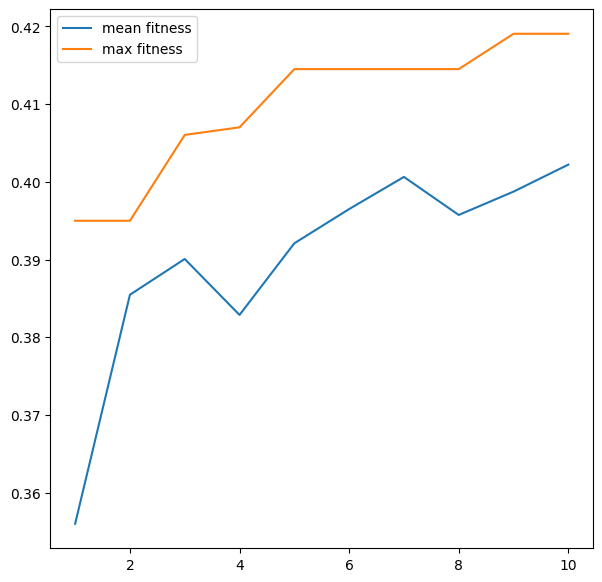


#############################
#			STATS			#
#############################


Total running time: 1 hours, 23 minutes, 38 seconds


Population size: 10
Number variables: 59
Selection rate: 0.3
Mutation rate: 0.025
Number Generations: 10

Best fitness: 0.41904184413646867
Best individual: [1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
None


In [36]:
solver = MyBinaryGenAlgSolver(pop_size=10, n_genes=59, mutation_rate=0.025, max_gen=10, selection_rate=0.3)
best_solution = solver.solve()
print(best_solution)

# Deep Neural Network after feature selection

In [38]:
Best_individual = [1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,]


selected_features_NN = [feature_ranking_total[i] for i, value in enumerate(Best_individual) if value == 1]
print(selected_features_NN)

['admission_type_EU OBSERVATION', 'race_encode_South American', 'height', 'charlson_score', 'wbc', 'glucose', 'bicarbonate', 'admission_age', 'weight_admit', 'ckd', 'ihd', 'first_careunit_Medical/Surgical Intensive Care Unit (MICU/SICU)', 'pt', 'race_encode_African', 'first_careunit_Coronary Care Unit (CCU)', 'mch']


In [39]:
# Reducing feature dimension of train and test data after genetic algorithm feature selection

X_train_selected_NN = X_train[selected_features_NN]
X_test_selected_NN = X_test[selected_features_NN]
X_holdout_selected_NN = X_holdout[selected_features_NN]

print(X_train_selected_NN.shape)
print(X_test_selected_NN.shape)
print(X_holdout_selected_NN.shape)

(14283, 16)
(4080, 16)
(2041, 16)


# Kfold cross validation + GridSearchCV for Deep Neural Network

In [40]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_validate
from sklearn.metrics import make_scorer, f1_score

In [41]:
# Combining X_train and X_test together for this GridSearch

X_combined = pd.concat([X_train_selected_NN, X_test_selected_NN], axis=0)

y_combined = pd.concat([y_train, y_test], axis=0)

In [43]:
stratifiedCV = StratifiedKFold(n_splits=5)

scorer = make_scorer(f1_score, average='macro')


MLP_NN = MLPClassifier(max_iter=500, random_state=26)

params = {
    'hidden_layer_sizes': [(128,32), (64,16)],
    'activation': ['relu', 'logistic'],
    'solver': ['adam', 'sgd']
}
best_NN = GridSearchCV(
    MLP_NN,
    param_grid=params,
    scoring=scorer,
    cv=stratifiedCV)

best_NN.fit(X_combined, y_combined)

C:\Users\ngqin\anaconda3\envs\python3.10\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ngqin\anaconda3\envs\python3.10\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ngqin\anaconda3\envs\python3.10\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ngqin\anaconda3\envs\python3.10\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=MLPClassifier(max_iter=500, random_state=26),
             param_grid={'activation': ['relu', 'logistic'],
                         'hidden_layer_sizes': [(128, 32), (64, 16)],
                         'solver': ['adam', 'sgd']},
             scoring=make_scorer(f1_score, response_method='predict', average=macro))

In [44]:
best_NN.best_params_

{'activation': 'logistic', 'hidden_layer_sizes': (64, 16), 'solver': 'adam'}

In [45]:
best_NN.best_score_

0.41447434164992414

In [46]:
best_NN_selected = MLPClassifier(hidden_layer_sizes=(64, 16), 
                                 activation='logistic', 
                                 solver='adam',
                                 max_iter=500, 
                                 random_state=26)


from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

scoring = ['precision_macro', 'recall_macro', 'accuracy', 'f1_macro']

# scoring = {
#     'precision_1': make_scorer(precision_score, pos_label=1),
#     'recall_1': make_scorer(recall_score, pos_label=1),
#     'f1_1': make_scorer(f1_score, pos_label=1),
#     'accuracy': make_scorer(accuracy_score)
# }

# Perform cross-validation
scores = cross_validate(best_NN_selected, X_combined, y_combined, cv=StratifiedKFold(), scoring=scoring, return_train_score=True)

C:\Users\ngqin\anaconda3\envs\python3.10\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ngqin\anaconda3\envs\python3.10\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ngqin\anaconda3\envs\python3.10\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ngqin\anaconda3\envs\python3.10\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users

In [47]:
cv_scores_NN_df = pd.DataFrame(scores)
cv_scores_NN_df.head()

,fit_time,score_time,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro,test_accuracy,train_accuracy,test_f1_macro,train_f1_macro
0,33.595628,0.019419,0.432739,0.505726,0.441118,0.501597,0.475361,0.539142,0.414964,0.477906
1,32.515707,0.017892,0.429803,0.510897,0.442586,0.504551,0.479445,0.539415,0.419484,0.487744
2,32.781329,0.017822,0.424791,0.505616,0.433465,0.497588,0.473727,0.536964,0.407527,0.474511
3,32.512424,0.019671,0.419368,0.508590,0.431941,0.507202,0.460512,0.538016,0.414730,0.492470
4,32.304402,0.017964,0.429961,0.519229,0.437034,0.506502,0.473312,0.542849,0.415667,0.489008


In [48]:
cv_scores_NN_df['precision_diff'] = cv_scores_NN_df['train_precision_macro'] - cv_scores_NN_df['test_precision_macro']
cv_scores_NN_df['recall_diff'] = cv_scores_NN_df['train_recall_macro'] - cv_scores_NN_df['test_recall_macro']
cv_scores_NN_df['f1_diff'] = cv_scores_NN_df['train_f1_macro'] - cv_scores_NN_df['test_f1_macro']
cv_scores_NN_df['accuracy_diff'] = cv_scores_NN_df['train_accuracy'] - cv_scores_NN_df['test_accuracy']
cv_order = ['fit_time', 'score_time', 'train_accuracy', 'test_accuracy', 'train_precision_macro', 'test_precision_macro', 'train_recall_macro', 'test_recall_macro', 'train_f1_macro', 'test_f1_macro', 'accuracy_diff', 'precision_diff', 'recall_diff', 'f1_diff']
cv_scores_NN_df = cv_scores_NN_df[cv_order]
cv_scores_NN_df.head(10)

,fit_time,score_time,train_accuracy,test_accuracy,train_precision_macro,test_precision_macro,train_recall_macro,test_recall_macro,train_f1_macro,test_f1_macro,accuracy_diff,precision_diff,recall_diff,f1_diff
0,33.595628,0.019419,0.539142,0.475361,0.505726,0.432739,0.501597,0.441118,0.477906,0.414964,0.063782,0.072987,0.060479,0.062942
1,32.515707,0.017892,0.539415,0.479445,0.510897,0.429803,0.504551,0.442586,0.487744,0.419484,0.059970,0.081094,0.061965,0.068260
2,32.781329,0.017822,0.536964,0.473727,0.505616,0.424791,0.497588,0.433465,0.474511,0.407527,0.063237,0.080825,0.064123,0.066984
3,32.512424,0.019671,0.538016,0.460512,0.508590,0.419368,0.507202,0.431941,0.492470,0.414730,0.077504,0.089223,0.075261,0.077741
4,32.304402,0.017964,0.542849,0.473312,0.519229,0.429961,0.506502,0.437034,0.489008,0.415667,0.069538,0.089268,0.069468,0.073341


In [50]:
best_NN_selected.fit(X_combined, y_combined)

y_holdout_cat_pred = best_NN_selected.predict(X_holdout_selected_NN)
X_holdout_df['icu_cat_pred'] = best_NN_selected.predict(X_holdout_selected_NN)

print("\n\nholdout Accuracy:\n", classification_report(y_holdout, y_holdout_cat_pred))

conf_matrix_holdout = confusion_matrix(y_holdout, y_holdout_cat_pred)

conf_matrix_holdout_df = pd.DataFrame(conf_matrix_holdout, columns=['Predicted_0', 'Predicted_1', 'Predicted_2'],
                               index=['True_0', 'True_1', 'True_2'])


print("Holdout dataset icu_cat prediction Confusion Matrix:")
print(conf_matrix_holdout_df)



holdout Accuracy:
               precision    recall  f1-score   support

           0       0.51      0.77      0.62       883
           1       0.38      0.08      0.13       614
           2       0.44      0.47      0.45       544

    accuracy                           0.48      2041
   macro avg       0.45      0.44      0.40      2041
weighted avg       0.45      0.48      0.43      2041

Holdout dataset icu_cat prediction Confusion Matrix:
        Predicted_0  Predicted_1  Predicted_2
True_0          683           50          150
True_1          387           50          177
True_2          259           30          255


C:\Users\ngqin\anaconda3\envs\python3.10\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [52]:
X_holdout_df.head(10)

,id,hosp_admittime,hosp_dischtime,icu_intime,icu_outtime,los_icu,icu_death,gender,admission_age,weight_admit,...,mcv,platelet,rbc,rdw,wbc,inr,pt,ptt,icu_cat,icu_cat_pred
0,20017191,2032-12-03 17:42:00,2032-12-08 15:46:00,2032-12-03 17:42:00,2032-12-06 18:02:00,3.01,0,0,84.924695,52.3,...,92.000000,106.000000,5.495000,14.450000,25.100000,1.150000,12.600,27.950000,1,0
1,20036035,2022-10-05 19:51:00,2022-10-09 18:00:00,2022-10-05 21:56:00,2022-10-09 19:49:00,3.91,1,0,84.760666,60.0,...,91.000000,217.500000,4.560000,13.450000,18.300000,1.350000,15.000,36.850000,1,2
2,20037205,2022-03-05 19:44:00,2022-03-13 14:28:00,2022-03-05 19:45:00,2022-03-08 22:18:00,3.11,0,0,47.174740,99.0,...,87.500000,412.000000,4.355000,13.150000,18.400000,1.400000,14.900,27.550000,1,2
3,20039772,2065-01-19 00:40:00,2065-02-04 16:57:00,2065-01-19 04:35:00,2065-01-22 19:03:00,3.60,0,1,58.051521,76.8,...,88.250000,255.750000,2.895000,16.175000,8.775000,2.100000,22.775,62.625000,1,2
4,20042202,2048-03-27 01:42:00,2048-04-10 13:21:00,2048-03-27 03:48:00,2048-03-31 22:28:00,4.78,0,1,63.235742,79.6,...,91.750000,162.750000,3.437500,15.525000,9.200000,1.350000,14.550,33.950000,1,2
5,20047616,1987-09-28 16:55:00,1987-10-08 16:30:00,1987-09-28 18:05:00,1987-09-30 20:50:00,2.11,0,0,73.741166,70.0,...,87.666667,278.000000,4.133333,14.066667,11.700000,1.233333,13.900,26.666667,0,1
6,20048682,2051-04-05 06:16:00,2051-04-09 12:05:00,2051-04-05 08:22:00,2051-04-06 12:20:00,1.17,0,0,67.256753,58.9,...,87.500000,359.000000,3.475000,17.500000,17.650000,1.400000,15.000,33.500000,0,0
7,20065759,2001-11-02 09:57:00,2001-11-10 01:45:00,2001-11-02 11:00:00,2001-11-10 05:20:00,7.76,1,1,88.833548,72.3,...,91.750000,127.000000,3.870000,17.350000,7.525000,1.550000,16.475,32.375000,2,2
8,20075994,2062-10-27 22:15:00,2062-10-30 14:40:00,2062-10-27 23:07:00,2062-10-30 16:51:00,2.74,1,1,73.821174,81.2,...,79.000000,358.666667,4.250000,16.266667,29.566667,1.400000,15.000,33.500000,1,0
9,20076204,2050-03-31 16:06:00,2050-04-06 18:18:00,2050-03-31 18:25:00,2050-04-03 10:21:00,2.66,0,0,78.246261,72.2,...,93.250000,143.500000,2.937500,16.775000,8.825000,1.400000,15.100,33.300000,1,0


# Random Forest Regressor

In [55]:
Cat0_X_train = X_train_df[X_train_df['icu_cat'] == 0]
Cat1_X_train = X_train_df[X_train_df['icu_cat'] == 1]
Cat2_X_train = X_train_df[X_train_df['icu_cat'] == 2]

Cat0_X_test = X_test_df[X_test_df['icu_cat'] == 0]
Cat1_X_test = X_test_df[X_test_df['icu_cat'] == 1]
Cat2_X_test = X_test_df[X_test_df['icu_cat'] == 2]

print(Cat0_X_train.shape)
print(Cat1_X_train.shape)
print(Cat2_X_train.shape)
print(Cat0_X_test.shape)
print(Cat1_X_test.shape)
print(Cat2_X_test.shape)

(6243, 68)
(4197, 68)
(3843, 68)
(1793, 68)
(1148, 68)
(1139, 68)


In [87]:
# splitting into X and Y

X_features_to_drop = ['id', 'los_icu', 'icu_death', 'hosp_admittime', 'hosp_dischtime', 'icu_intime', 'icu_outtime', 'icu_cat', 'icu_outcome']

y_train_cat0 = Cat0_X_train.los_icu
X_train_cat0 = Cat0_X_train.drop(columns=X_features_to_drop)

y_test_cat0 = Cat0_X_test.icu_cat
X_test_cat0 = Cat0_X_test.drop(columns=X_features_to_drop)

y_train_cat1 = Cat1_X_train.los_icu
X_train_cat1 = Cat1_X_train.drop(columns=X_features_to_drop)

y_test_cat1 = Cat1_X_test.los_icu
X_test_cat1 = Cat1_X_test.drop(columns=X_features_to_drop)

print(X_train_cat0.shape)
print(X_test_cat0.shape)
print(X_train_cat1.shape)
print(X_test_cat1.shape)
print(y_train_cat0.shape)
print(y_test_cat0.shape)
print(y_train_cat1.shape)
print(y_test_cat1.shape)

(6243, 59)
(1793, 59)
(4197, 59)
(1148, 59)
(6243,)
(1793,)
(4197,)
(1148,)


In [88]:
# predicting MSE of cat0 icu_cat_pred of holdout data from first NN model

holdout_pred_cat0_df = X_holdout_df[X_holdout_df['icu_cat_pred'] == 0]
holdout_pred_cat1_df = X_holdout_df[X_holdout_df['icu_cat_pred'] == 1]

print(holdout_pred_cat0_df.shape)
print(holdout_pred_cat1_df.shape)

(1329, 69)
(130, 69)


In [89]:
X_holdout_features_to_drop = ['id', 'los_icu', 'icu_death', 'hosp_admittime', 'hosp_dischtime', 'icu_intime', 'icu_outtime', 'icu_cat', 'icu_outcome', 'icu_cat_pred']

X_holdout_pred_cat0 = holdout_pred_cat0_df.drop(columns=X_holdout_features_to_drop)
y_holdout_reg_cat0 = holdout_pred_cat0_df.los_icu

X_holdout_pred_cat1 = holdout_pred_cat1_df.drop(columns=X_holdout_features_to_drop)
y_holdout_reg_cat1 = holdout_pred_cat1_df.los_icu

print(X_holdout_pred_cat0.shape)
print(X_holdout_pred_cat1.shape)
print(y_holdout_reg_cat0.shape)
print(y_holdout_reg_cat1.shape)

(1329, 59)
(130, 59)
(1329,)
(130,)


In [90]:
# Perform normalization using data from X_train to transform X_test for CAT0

from sklearn.preprocessing import StandardScaler

num_cols = X_train_cat0.columns[X_train_cat0.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
# print(num_cols)
scaler_cat0 = StandardScaler()
X_train_cat0[num_cols] = scaler_cat0.fit_transform(X_train_cat0[num_cols])
X_test_cat0[num_cols] = scaler_cat0.transform(X_test_cat0[num_cols])
X_holdout_pred_cat0[num_cols] = scaler_cat0.transform(X_holdout_pred_cat0[num_cols])

In [91]:
X_holdout_pred_cat0.describe()

,gender,admission_age,weight_admit,height,charlson_score,atrial_fibrillation,malignant_cancer,chf,ckd,cld,...,mch,mchc,mcv,platelet,rbc,rdw,wbc,inr,pt,ptt
count,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,...,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000
mean,0.005951,0.005059,-0.015768,0.001135,0.014066,0.033572,-0.008097,0.053214,0.038860,-0.058628,...,0.026565,0.001754,0.031395,0.001223,-0.013268,0.011843,0.003802,-0.014115,-0.017866,0.014924
std,0.999631,1.008558,0.789125,0.907918,1.020459,1.018478,0.991817,1.018034,1.004870,0.924653,...,0.989780,1.030059,0.982395,1.019990,0.971712,0.961903,1.084689,1.124364,1.145289,1.058137
min,-1.129591,-3.117846,-2.746396,-5.550409,-1.946083,-0.585797,-0.400511,-0.702016,-0.873819,-0.359073,...,-4.357416,-4.217825,-3.741144,-1.985078,-2.987631,-1.947009,-1.546576,-1.117834,-1.181794,-1.128259
25%,-1.129591,-0.613069,-0.549268,0.020882,-0.591937,-0.585797,-0.400511,-0.702016,-0.873819,-0.359073,...,-0.446956,-0.581999,-0.535620,-0.544374,-0.638809,-0.611290,-0.434428,-0.445380,-0.421161,-0.428530
50%,0.885276,0.100986,-0.114420,0.020882,0.085136,-0.585797,-0.400511,-0.702016,-0.873819,-0.359073,...,0.070916,0.013062,-0.054792,-0.141115,-0.101609,-0.138395,-0.163284,-0.252415,-0.249589,-0.215454
75%,0.885276,0.766109,0.362932,0.020882,0.762208,1.707075,-0.400511,1.424469,1.144402,-0.359073,...,0.546513,0.584321,0.506175,0.337108,0.561318,0.458945,0.204368,-0.138390,-0.129489,-0.065512
max,0.885276,1.940691,4.544667,4.126044,4.486108,1.707075,2.496811,1.424469,1.144402,2.784953,...,4.478110,6.249306,4.539793,10.149745,3.878815,5.262558,27.406054,20.342228,22.946859,8.978364


In [92]:
X_test_cat0.describe()

,gender,admission_age,weight_admit,height,charlson_score,atrial_fibrillation,malignant_cancer,chf,ckd,cld,...,mch,mchc,mcv,platelet,rbc,rdw,wbc,inr,pt,ptt
count,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,...,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000
mean,-0.041810,-0.018786,-0.032277,-0.018940,-0.055528,-0.010341,-0.002998,-0.044976,-0.012726,-0.034675,...,0.016154,0.037152,-0.004929,0.005217,0.030227,-0.017661,0.051787,0.045021,0.038148,0.039264
std,1.004505,1.011321,0.866304,1.046400,0.978059,0.994409,0.997127,0.982865,0.998474,0.956656,...,1.027507,1.000718,1.024920,1.001410,1.031613,1.053923,1.531883,1.244556,1.214319,1.133619
min,-1.129591,-3.075017,-2.452137,-5.843635,-1.946083,-0.585797,-0.400511,-0.702016,-0.873819,-0.359073,...,-5.794774,-4.628417,-5.023354,-1.981631,-3.033350,-1.930416,-1.546576,-1.234783,-1.291273,-1.241374
25%,-1.129591,-0.668274,-0.608120,0.020882,-0.591937,-0.585797,-0.400511,-0.702016,-0.873819,-0.359073,...,-0.446956,-0.522493,-0.535620,-0.554714,-0.630237,-0.669364,-0.429832,-0.401524,-0.398285,-0.407485
50%,0.885276,0.077299,-0.137307,0.020882,-0.253401,-0.585797,-0.400511,-0.702016,-0.873819,-0.359073,...,0.081485,0.084470,-0.054792,-0.141115,-0.067320,-0.198129,-0.140306,-0.217330,-0.215275,-0.215454
75%,0.885276,0.747838,0.392358,0.020882,0.762208,1.707075,-0.400511,1.424469,1.144402,-0.359073,...,0.525375,0.637877,0.506175,0.386223,0.608466,0.409167,0.282494,-0.094534,-0.095175,-0.051701
max,0.885276,2.062524,13.568583,5.592174,3.470499,1.707075,2.496811,1.424469,1.144402,2.784953,...,5.436349,4.083283,5.394599,7.624206,4.847489,9.120382,51.753837,16.482925,17.139169,8.978364


In [93]:
# Perform normalization using data from X_train to transform X_test for CAT1

from sklearn.preprocessing import StandardScaler

num_cols = X_train_cat1.columns[X_train_cat1.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
# print(num_cols)
scaler_cat1 = StandardScaler()
X_train_cat1[num_cols] = scaler_cat1.fit_transform(X_train_cat1[num_cols])
X_test_cat1[num_cols] = scaler_cat1.transform(X_test_cat1[num_cols])
X_holdout_pred_cat1[num_cols] = scaler_cat1.transform(X_holdout_pred_cat1[num_cols])

In [94]:
X_holdout_pred_cat1.describe()

,gender,admission_age,weight_admit,height,charlson_score,atrial_fibrillation,malignant_cancer,chf,ckd,cld,...,mch,mchc,mcv,platelet,rbc,rdw,wbc,inr,pt,ptt
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,-0.069873,0.058202,-0.030744,-0.044927,0.052978,0.081674,0.077355,0.047297,0.014058,-0.013612,...,-0.072489,0.048902,-0.115907,0.054766,-0.059183,0.103469,0.171287,0.089012,0.083240,0.130086
std,1.009562,0.979461,1.074498,0.870416,1.026074,1.043630,1.080813,1.017122,1.005719,0.986817,...,0.924348,1.008294,0.854671,1.004993,0.937082,0.975035,0.719317,0.907385,0.859405,1.005400
min,-1.123083,-2.972423,-1.653201,-3.165219,-2.020151,-0.598909,-0.395219,-0.740749,-0.871212,-0.355115,...,-3.159632,-2.817946,-3.207948,-1.984789,-2.162912,-1.944896,-1.007845,-0.844726,-0.882273,-1.166072
25%,-1.123083,-0.545236,-0.622337,0.037860,-0.659006,-0.598909,-0.395219,-0.740749,-0.871212,-0.355115,...,-0.475396,-0.449728,-0.606827,-0.542358,-0.690500,-0.499461,-0.279837,-0.367909,-0.337690,-0.362090
50%,0.890406,0.166087,-0.210924,0.037860,0.021567,-0.598909,-0.395219,-0.740749,-0.871212,-0.355115,...,0.004666,0.035178,-0.064500,-0.013814,-0.161687,-0.044678,-0.035969,-0.208970,-0.227463,-0.246499
75%,0.890406,0.806322,0.201421,0.037860,0.702140,1.669702,-0.395219,1.349986,1.147826,-0.355115,...,0.241575,0.532597,0.303873,0.489995,0.460489,0.707389,0.429722,0.029439,0.041433,0.372474
max,0.890406,1.684961,6.619831,2.344077,2.403572,1.669702,2.530240,1.349986,1.147826,2.815988,...,2.390286,2.678071,2.282171,5.329949,3.267762,4.138270,2.777073,4.241321,3.999698,5.402304


In [95]:
X_test_cat1.describe()

,gender,admission_age,weight_admit,height,charlson_score,atrial_fibrillation,malignant_cancer,chf,ckd,cld,...,mch,mchc,mcv,platelet,rbc,rdw,wbc,inr,pt,ptt
count,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,...,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000
mean,-0.025135,0.004454,-0.014159,-0.051536,-0.037124,0.003814,-0.041004,-0.003164,0.048611,0.017793,...,0.015861,0.050695,-0.008711,0.008858,0.000037,-0.016284,-0.019969,0.033902,0.030379,0.039213
std,1.003042,0.969885,0.933715,0.968411,0.959947,1.002470,0.954761,0.999466,1.005965,1.021949,...,1.019373,1.063763,1.009521,0.955042,0.996068,0.993008,0.682750,1.032955,0.978090,1.013554
min,-1.123083,-3.150412,-3.108538,-5.471435,-2.020151,-0.598909,-0.395219,-0.740749,-0.871212,-0.355115,...,-5.069597,-4.619919,-4.484973,-1.914490,-2.906957,-2.068287,-1.284289,-1.003664,-0.984132,-1.436534
25%,-1.123083,-0.670759,-0.608343,-0.218386,-0.659006,-0.598909,-0.395219,-0.740749,-0.871212,-0.355115,...,-0.441605,-0.565480,-0.555664,-0.536283,-0.614956,-0.620502,-0.392323,-0.367909,-0.372977,-0.415055
50%,0.890406,0.067344,-0.149352,0.037860,0.021567,-0.598909,-0.395219,-0.740749,-0.871212,-0.355115,...,0.087309,0.035178,-0.064500,-0.160140,-0.093269,-0.192747,-0.172751,-0.208970,-0.227463,-0.246499
75%,0.890406,0.755564,0.399198,0.037860,0.702140,1.669702,-0.395219,1.349986,1.147826,-0.355115,...,0.594184,0.673376,0.535811,0.401904,0.548149,0.368681,0.173255,-0.010296,-0.004343,0.016880
max,0.890406,2.006952,5.436903,4.265924,3.424431,1.669702,2.530240,1.349986,1.147826,2.815988,...,5.640900,3.864370,6.566210,5.472978,5.183465,6.075505,6.972337,10.360470,9.834780,8.756040


In [96]:
# training RandomForestRegressor for Cat0

from sklearn.ensemble import RandomForestRegressor

rf_regressor_cat0 = RandomForestRegressor(n_estimators=100, max_depth=8, min_samples_split=10, random_state=26)

rf_regressor_cat0.fit(X_train_cat0, y_train_cat0)

RandomForestRegressor(max_depth=8, min_samples_split=10, random_state=26)

In [97]:
# training RandomForestRegressor for Cat1

rf_regressor_cat1 = RandomForestRegressor(n_estimators=100, max_depth=8, min_samples_split=10, random_state=26)

rf_regressor_cat1.fit(X_train_cat1, y_train_cat1)

RandomForestRegressor(max_depth=8, min_samples_split=10, random_state=26)

In [98]:
X_holdout_pred_cat0.describe()

,gender,admission_age,weight_admit,height,charlson_score,atrial_fibrillation,malignant_cancer,chf,ckd,cld,...,mch,mchc,mcv,platelet,rbc,rdw,wbc,inr,pt,ptt
count,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,...,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000
mean,0.005951,0.005059,-0.015768,0.001135,0.014066,0.033572,-0.008097,0.053214,0.038860,-0.058628,...,0.026565,0.001754,0.031395,0.001223,-0.013268,0.011843,0.003802,-0.014115,-0.017866,0.014924
std,0.999631,1.008558,0.789125,0.907918,1.020459,1.018478,0.991817,1.018034,1.004870,0.924653,...,0.989780,1.030059,0.982395,1.019990,0.971712,0.961903,1.084689,1.124364,1.145289,1.058137
min,-1.129591,-3.117846,-2.746396,-5.550409,-1.946083,-0.585797,-0.400511,-0.702016,-0.873819,-0.359073,...,-4.357416,-4.217825,-3.741144,-1.985078,-2.987631,-1.947009,-1.546576,-1.117834,-1.181794,-1.128259
25%,-1.129591,-0.613069,-0.549268,0.020882,-0.591937,-0.585797,-0.400511,-0.702016,-0.873819,-0.359073,...,-0.446956,-0.581999,-0.535620,-0.544374,-0.638809,-0.611290,-0.434428,-0.445380,-0.421161,-0.428530
50%,0.885276,0.100986,-0.114420,0.020882,0.085136,-0.585797,-0.400511,-0.702016,-0.873819,-0.359073,...,0.070916,0.013062,-0.054792,-0.141115,-0.101609,-0.138395,-0.163284,-0.252415,-0.249589,-0.215454
75%,0.885276,0.766109,0.362932,0.020882,0.762208,1.707075,-0.400511,1.424469,1.144402,-0.359073,...,0.546513,0.584321,0.506175,0.337108,0.561318,0.458945,0.204368,-0.138390,-0.129489,-0.065512
max,0.885276,1.940691,4.544667,4.126044,4.486108,1.707075,2.496811,1.424469,1.144402,2.784953,...,4.478110,6.249306,4.539793,10.149745,3.878815,5.262558,27.406054,20.342228,22.946859,8.978364


In [101]:
from sklearn.metrics import mean_squared_error

y_holdout_pred_cat0 = rf_regressor_cat0.predict(X_holdout_pred_cat0)
mse_holdout_rfregressor_cat0 = mean_squared_error(y_holdout_reg_cat0, y_holdout_pred_cat0)
print("RF regressor Predicted Cat0 Holdout MSE:", mse_holdout_rfregressor_cat0)

y_holdout_pred_cat1 = rf_regressor_cat1.predict(X_holdout_pred_cat1)
mse_holdout_rfregressor_cat1 = mean_squared_error(y_holdout_reg_cat1, y_holdout_pred_cat1)
print("RF regressor Predicted Cat1 Holdout MSE:", mse_holdout_rfregressor_cat1)

RF regressor Predicted Cat0 Holdout MSE: 26.928415720789392
RF regressor Predicted Cat1 Holdout MSE: 21.008456688624808


In [102]:
Overall_holdout_MSE = (mse_holdout_rfregressor_cat0 * len(X_holdout_pred_cat0) + mse_holdout_rfregressor_cat1 * len(X_holdout_pred_cat1)) / (len(X_holdout_pred_cat0) + len(X_holdout_pred_cat1))

print("Overall combined Classification + Regression holdout data MSE:", Overall_holdout_MSE)

Overall combined Classification + Regression holdout data MSE: 26.400934792632164
